## Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from copy import copy
from scipy import stats
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [ ]:
stock_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python & ML in Finance/Part 3. AI and ML in Finance/stock.csv')
stockv_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python & ML in Finance/Part 3. AI and ML in Finance/stock_volume.csv')

In [ ]:
stock_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:
stockv_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000


In [ ]:
stock_df = stock_df.sort_values('Date')

In [ ]:
stock_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
stockv_df = stockv_df.sort_values('Date')
stockv_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [ ]:
stock_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
stockv_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
stockv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
stock_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [ ]:
stockv_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


In [ ]:
# average trading volume for apple stock

stockv_df.AAPL.mean()

58203317.41547012

In [ ]:
# maximum trading volumes for sp500

stockv_df.sp500.max()

9044690000

## EDA AND VISUALIZATION

In [ ]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]

  return x


In [ ]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)

  fig.show()

In [ ]:
interactive_plot(stock_df, 'Stock Prices')

In [ ]:
interactive_plot(stockv_df, 'Stock Volumes')

In [ ]:
interactive_plot(normalize(stockv_df), 'Normalized Stocks Volume')

## Prepare Data before training and testing

In [ ]:
def individual_stock(price_df, vol_df, name):
  return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [ ]:
def trading_window(data):
  n = 1
  data['Target'] = data[['Close']].shift(-n)

  return data

In [ ]:
price_volume_df = individual_stock(stock_df, stockv_df, 'AAPL')
price_volume_df


,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [ ]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004
2157,2020-08-10,450.910004,53100900,437.500000


In [ ]:
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [ ]:
# Scale the data

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns=['Date']))

In [ ]:
X = price_volume_target_scaled_df[:, :2]
y = price_volume_target_scaled_df[:, -1]

In [ ]:
X.shape

(2158, 2)

In [ ]:
y.shape

(2158,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_test.shape

(432, 2)

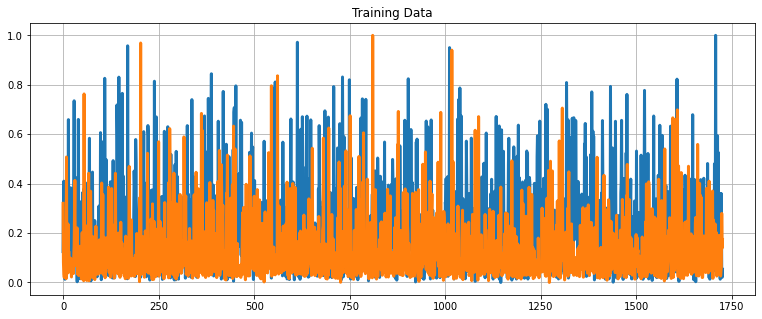

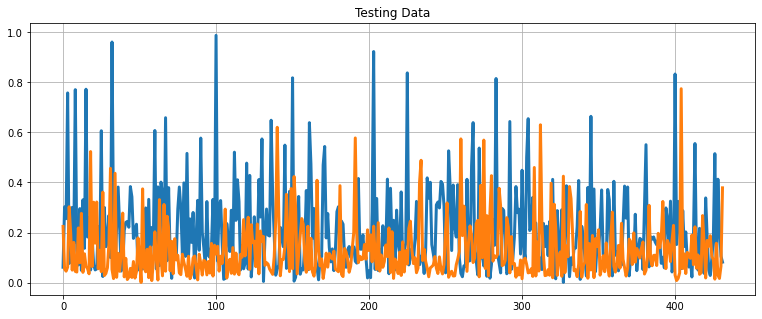

In [ ]:
def show_plot(data, title):
  plt.figure(figsize=(13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


## Training using ML

In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge()
reg.fit(X_train, y_train)

Ridge()

In [ ]:
lr_acc = reg.score(X_test, y_test)
print('Ridge Regression Score is: ', lr_acc)

Ridge Regression Score is:  0.9972359400699883


In [ ]:
predicted_prices = reg.predict(X)
predicted_prices

array([0.01537988, 0.01472301, 0.01631032, ..., 0.98674494, 0.9593668 ,
       0.97512387])

In [ ]:
predicted = []
for i in predicted_prices:
  predicted.append(i)

In [ ]:
len(predicted)

2158

In [ ]:
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [ ]:
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])
  

In [ ]:
predicted_df = price_volume_target_df[['Date']]
predicted_df

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [ ]:
predicted_df['Close'] = close
predicted_df

,Date,Close
0,2012-01-12,0.011026
1,2012-01-13,0.010462
2,2012-01-17,0.012209
3,2012-01-18,0.013785
4,2012-01-19,0.013299
...,...,...
2153,2020-08-04,0.957606
2154,2020-08-05,0.961583
2155,2020-08-06,1.000000
2156,2020-08-07,0.972088


In [ ]:
predicted_df['Prediction'] = predicted

In [ ]:
predicted_df

,Date,Close,Prediction
0,2012-01-12,0.011026,0.015380
1,2012-01-13,0.010462,0.014723
2,2012-01-17,0.012209,0.016310
3,2012-01-18,0.013785,0.017599
4,2012-01-19,0.013299,0.017237
...,...,...,...
2153,2020-08-04,0.957606,0.945333
2154,2020-08-05,0.961583,0.949628
2155,2020-08-06,1.000000,0.986745
2156,2020-08-07,0.972088,0.959367


In [ ]:
interactive_plot(predicted_df, 'Original vs. Predictions')

In [ ]:
# Experimenting with alphas for Ridge Regression

scores = {}

for i in range(1, 6):
  reg = Ridge(alpha = i)
  reg.fit(X_train, y_train)
  scores[i] = reg.score(X_test, y_test)

scores

{1: 0.9972359400699883,
 2: 0.9963758448509864,
 3: 0.9948623304404306,
 4: 0.9927997612378625,
 5: 0.9902725143710149}

In [ ]:
predicted_df

,Date,Close,Prediction
0,2012-01-12,0.011026,0.015380
1,2012-01-13,0.010462,0.014723
2,2012-01-17,0.012209,0.016310
3,2012-01-18,0.013785,0.017599
4,2012-01-19,0.013299,0.017237
...,...,...,...
2153,2020-08-04,0.957606,0.945333
2154,2020-08-05,0.961583,0.949628
2155,2020-08-06,1.000000,0.986745
2156,2020-08-07,0.972088,0.959367


In [ ]:
# predicted_prices_new = {}

# for i in reg.predict()

SyntaxError: ignored

## Training with Deep Learning using LSTM

In [ ]:
price_volume_df = individual_stock(stock_df, stockv_df, 'sp500')
price_volume_df

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [ ]:
training_df = price_volume_df.iloc[:, 1:3].values
training_df

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_df)

In [ ]:
X = []
y = []

for i in range(len(price_volume_df)):
  X.append(training_set_scaled[i-1:i, 0])
  y.append(training_set_scaled[i, 0])

In [ ]:
X = np.asarray(X)
y = np.asarray(y)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# split = int(0.7 * len(X))

# X_train = X[:split]
# X_test = X[split:]

# y_train = y[:split]
# y_test = y[split:]

In [81]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_test.shape

IndexError: ignored

((1727, 1, 1), (432, 1, 1))

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

ValueError: ignored

In [ ]:
# Create a model

inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))

x = keras.layers.LSTM(150, return_sequences=True) (inputs)
x = keras.layers.LSTM(150, return_sequences=True) (x)
x = keras.layers.LSTM(150, return_sequences=True) (x)
outputs = keras.layers.Dense(1, activation='linear') (x)

model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

IndexError: ignored

In [ ]:
# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

ValueError: ignored

In [ ]:
predictions = model.predict(X)

ValueError: ignored

In [ ]:
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

IndexError: ignored

In [ ]:
df_predicted = price_volume_df[1:][['Date']]

In [ ]:
df_predicted['Predictions'] = test_predicted

NameError: ignored

In [ ]:
close = []

for i in range(training_set_scaled):
  close.append(i[0])

In [ ]:
df_predicted['Close'] = close

In [ ]:
interactive_plot(df_predicted, 'Original Price vs. LSTM Predictions')